# Text segmentation using Hidden Markov Models 

### Task : automatic segmentation of mails, problem statement

This Lab aims to build an email segmentation tool, dedicated to separate the email header from its
body. It is proposed to perform this task by learning a HMM (A, B, π) with two states, one (state 1) for
the header, the other (state 2) for the body. In this model, it is assumed that each mail actually contains
a header : the decoding necessarily begins in the state 1.

#### Loading data

In [2]:
import os.path as op
import re 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
B = np.loadtxt('PerlScriptAndModel/P.dat')
A = np.array([[0.999218078035812,0.000781921964187974],[0,1]])

#### Q1 : Give the value of the π vector of the initial probabilities

Since the decoding necessarily begins in the state 1, the vector of initial probabilities π = [1,0].

In [4]:
pi = [1,0]
pi = np.array(pi)
pi

array([1, 0])

The transition matrix (A(i, j) = P(j|i)) estimated on a labeled small corpus has the
following form : 
A =\begin{pmatrix}
0.999218078035812 & 0.000781921964187974\\
0 & 1
\end{pmatrix}  


#### Q2 : What is the probability to move from state 1 to state 2 ? What is the probability to remain in state 2 ? What is the lower/higher probability ? Try to explain why.

Given A, the probability to move from state 1 to state 2 is 0.000781921964187974, then the probability to remain in 2 is 1 as you can't go back to the header once you're in the body of the email. This is why the highest probability is 1 for the transition 2->2 and the lowest probability is 0 for the transition 2->1.


A mail is represented by a sequence of characters. Let N be the number of different characters. Each
part of the mail is characterized by a discrete probability distribution on the characters P(c|s), with s = 1
or s = 2.
#### Q3 : What is the size of B ?

In [5]:
print('The size of B is',B.size,'.') 

The size of B is 512 .


This can be explained by the fact that there are 2 states and 256 characters, so B has 2 columns and 256 lines. The size is then 2 x 256.

### Material

##### Coding/decoding mails

Emails are represented as ASCII character vectors.
In dat.zip, mail.txt can be transformed into a vector of numbers (between 0 and 255) (one vector per
line) in a text ;
Files of the form dat/*.dat contain the already encoded versions of the corresponding mails. The list
is in mail.lst.
Use the command np.loadtxt to load the dat files.

In [6]:
dat = []
for i in range(11,31):
    dat.append(np.loadtxt("dat/mail" + str(i) + ".dat", dtype=int))


##### Distribution files

For the first part of the Lab, we work with the distributions that are provided in the P.text file.
Each of the columns of this file contains the distribution of the probabilities of occurrence of each
character of the ASCII codes respectively in the header and in the body. These distributions were learned
on a small corpus labeled with 10 emails ; there are obvious differences, especially in areas where ASCII
codes correspond to alphabetic characters, as you can see by viewing these distributions.

#####  Viterbi algorithm

In [7]:
A=[[
0.999218078035812,0.000781921964187974],[0,1]]

B=np.loadtxt("PerlScriptAndModel/P.text")

pi=[1.0,np.finfo(np.double).tiny]

In [8]:
def viterbi(V,pi,A,P):
    
    #initialization 
    
    T=len(V)
    minlog = np.finfo(np.double).tiny
    
    pi=np.log(pi+minlog)
    P=np.log(P+minlog)
    A=np.log(A+minlog)
    
    delta=np.zeros((2,T))
    phi=np.zeros((2,T))
    
    for i in range(2):
         delta[i,0]=pi[i]+P[V[0],i]
    
    #recursion
    
    for t in range(1,T):
        for j in range(2):
            delta[j,t]=P[V[t],j]+max(A[0][j]+delta[0,t-1],A[1][j]+delta[1,t-1])
            if A[0][j]+delta[0,t-1]<=A[1][j]+delta[1,t-1]:
                phi[j,t]=1
            else:
                phi[j,t]=0
    
    #termination
    
    Z=np.zeros(T)
    
    if delta[0,T-1]<=delta[1,T-1]:
        Z[T-1]=1
    else:
        Z[T-1]=0
    
    for j in range(T-2,-1,-1):
        Z[j]=phi[int(Z[j+1]),j+1]
    
    return Z+np.ones(len(Z))


In [9]:
#We verify that the algorithm works with a random email

print(viterbi(dat[23-11],pi,A,B))

[1. 1. 1. ... 2. 2. 2.]


#### Q4 : print the track and present and discuss the results obtained on mail11.txt to mail30.txt

In [10]:
track = []
for i in range(11,31):
    track.append(viterbi(dat[i-11],pi,A,B))

##### Visualizing segmentation

In [20]:
i = 23
path1 = np.savetxt('path1.txt',track[i-11],'%d',newline='')


In [21]:
!cd PerlScriptAndModel/; perl segment.pl ../dat/mail23.txt ../path1.txt

1111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111111

##### Discussion on the results and the method :

Let's see how performant the segmenter is. We are going to look at the mails between 10 and 31 one by one and arbitrarily, we are going to mark a 0 if the separation is corect, a -1 if it's too early and a 1 if it's late.

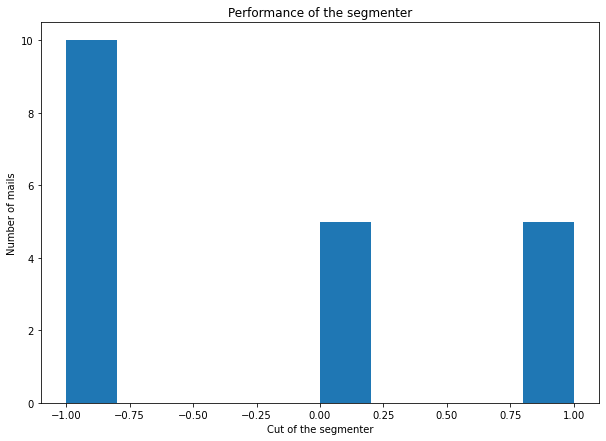

In [189]:
Performance = [0,0,-1,1,1,0,1,1,-1,-1,-1,-1,-1,-1,-1,0,-1,1,0,-1]

fig, ax = plt.subplots(figsize =(10, 7))
ax.hist(Performance)
plt.xlabel("Cut of the segmenter")
plt.ylabel("Number of mails")
plt.title('Performance of the segmenter')
 
# Show plot
plt.show()
    

With the histogram above, we can see that the segmenter is only correct 25% of the time. It's early 50% of the time and late 25% of the time. We'd like to note that even when it's not correct, it's not very far from the real cut. There is often a problem with the date and mentioning, meaning when the emails are forwarded and the symbol '>' is being used.

### Further questions

#### Q5 : How would you model the problem if you had to segment the mails in more than two parts (for example : header, body, signature) ?

In general, the viterbi algorithm can work with a set of states of any size. Thus we would use the same algorithm. We just need new matrix A, P and pi.

We can take $\pi=(1$ $0$ $0)$ if we still suppose that every mail contains and begins by a header.

P can be learn with a set of train mails as in the previous exemple.

To know A, we need the probability to go from state 1 to state 2 (let denote it $\alpha$) and from state 2 to state 3 (let denote it $\beta$).

Then we will have if we suppose that it's impossible to go directly from header to signature:

$A=\begin{bmatrix} 
	1-\alpha & \alpha & 0 \\
	0 & 1-\beta & \beta\\
	0 & 0 & 1 \\
	\end{bmatrix}$

#### Q6 : How would you model the problem of separating the portions of mail included, knowing that they always start with the character ">".

This problem could be soved in the same way than in the question 5, with A of shape 4x4 : header, mail included (marked with >), body, signature. The possible changes are :

-From header to header, mail included or body

-From mail included to mail included, body or signature

-From body to mail included, body or signature

-From signature to signature

Then the matrix A is $A=\begin{bmatrix} 
	1-\alpha_1-\alpha_2 & \alpha_1 & \alpha_2 & 0 \\
	0 & 1-\beta_1-\beta_2 & \beta_1 & \beta_2\\
	0 & 0 & 0 & 1 \\
	\end{bmatrix}$
    
 Another solution would be to use two Viterbi algorithms following each other : the first one separating header, general body, signature and the second one separating normal text and lines beggining with '>'.

### BONUS : Unsupervised learning

We now propose to implement the necessary bricks for the unsupervised learning of the parameters
of the model.
1. Program the alpha calculation. 